# Import

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import json

# Initialization 

In [2]:
folder_name = '20231204_223002_756465'

In [3]:
root_folder = os.path.join(os.getcwd(),'results',folder_name)
json_file_path = os.path.join(root_folder, 'data.json')

with open(json_file_path) as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data).transpose()
df

state   
-20  [{'timestamp': 1701700307.398706, 'name': 'Eye...  \
-10  [{'timestamp': 1701700421.700021, 'name': 'Eye...   
0    [{'timestamp': 1701700545.337938, 'name': 'Eye...   
10   [{'timestamp': 1701700800.238415, 'name': 'Eye...   
20   [{'timestamp': 1701700929.102591, 'name': 'Eye...   

                                motor_position   
-20  [-7.822265625, -7.470703125, 1.669921875]  \
-10     [-1.7578125, -5.09765625, 0.966796875]   
0        [3.33984375, -3.076171875, 1.7578125]   
10       [6.15234375, 2.98828125, 0.439453125]   
20      [7.91015625, 7.294921875, 0.439453125]   

                                          eye_position   
-20  [-12.733083984375, -12.4439501953125, 0.646259...  \
-10   [-2.8613671875, -8.491166015625, 0.374150390625]   
0      [5.43659765625, -5.1239794921875, 0.6802734375]   
10   [10.01478515625, 4.9775800781249995, 0.1700683...   
20   [12.876152343749999, 12.1511513671875, 0.17006...   

                                            left_img   
-20  results/20231204_223002_756465/-20_left_eye.png  \
-10  results/20231204_223002_756465/-10_left_eye.png   
0      results/20231204_223002_756465/0_left_eye.png   
10    results/20231204_223002_756465/10_left_eye.png   
20    results/20231204_223002_756465/20_left_eye.png   

                                            right_img  
-20  results/20231204_223002_756465/-20_right_eye.png  
-10  results/20231204_223002_756465/-10_right_eye.png  
0      results/20231204_223002_756465/0_right_eye.png  
10    results/20231204_223002_756465/10_right_eye.png  
20    results/20231204_223002_756465/20_right_eye.png

In [27]:
data

{'-20': {'state': [{'timestamp': 1701700307.398706,
    'name': 'EyeTurnLeft',
    'position': 1961.0,
    'speed': 0.0,
    'load': 0.0,
    'voltage': 6.1,
    'temperature': 59,
    'torque_enabled': True,
    'torque_limit': 0.0,
    'errorCode': 0,
    'angle': -7.822265625},
   {'timestamp': 1701700307.399838,
    'name': 'EyeTurnRight',
    'position': 1965.0,
    'speed': 0.0,
    'load': -0.091,
    'voltage': 5.8,
    'temperature': 60,
    'torque_enabled': True,
    'torque_limit': 0.0,
    'errorCode': 0,
    'angle': -7.470703125},
   {'timestamp': 1701700307.397394,
    'name': 'EyesUpDown',
    'position': 2069.0,
    'speed': 0.0,
    'load': 0.04,
    'voltage': 5.9,
    'temperature': 56,
    'torque_enabled': True,
    'torque_limit': 0.0,
    'errorCode': 0,
    'angle': 1.669921875}],
  'motor_position': [-7.822265625, -7.470703125, 1.669921875],
  'eye_position': [-12.733083984375, -12.4439501953125, 0.646259765625],
  'left_img': 'results/20231204_223002_756465/

# Data Filtering

In [4]:
# Function to load image array from file path using OpenCV
def load_image(image_path):
    image = cv2.imread(image_path)
    # Perform any image processing if needed
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image

In [5]:
# Convert to DataFrames
df['left_img_value'] = df['left_img'].apply(load_image)
df['right_img_value'] = df['right_img'].apply(load_image)
df.head()

state   
-20  [{'timestamp': 1701700307.398706, 'name': 'Eye...  \
-10  [{'timestamp': 1701700421.700021, 'name': 'Eye...   
0    [{'timestamp': 1701700545.337938, 'name': 'Eye...   
10   [{'timestamp': 1701700800.238415, 'name': 'Eye...   
20   [{'timestamp': 1701700929.102591, 'name': 'Eye...   

                                motor_position   
-20  [-7.822265625, -7.470703125, 1.669921875]  \
-10     [-1.7578125, -5.09765625, 0.966796875]   
0        [3.33984375, -3.076171875, 1.7578125]   
10       [6.15234375, 2.98828125, 0.439453125]   
20      [7.91015625, 7.294921875, 0.439453125]   

                                          eye_position   
-20  [-12.733083984375, -12.4439501953125, 0.646259...  \
-10   [-2.8613671875, -8.491166015625, 0.374150390625]   
0      [5.43659765625, -5.1239794921875, 0.6802734375]   
10   [10.01478515625, 4.9775800781249995, 0.1700683...   
20   [12.876152343749999, 12.1511513671875, 0.17006...   

                                            left_img   
-20  results/20231204_223002_756465/-20_left_eye.png  \
-10  results/20231204_223002_756465/-10_left_eye.png   
0      results/20231204_223002_756465/0_left_eye.png   
10    results/20231204_223002_756465/10_left_eye.png   
20    results/20231204_223002_756465/20_left_eye.png   

                                            right_img   
-20  results/20231204_223002_756465/-20_right_eye.png  \
-10  results/20231204_223002_756465/-10_right_eye.png   
0      results/20231204_223002_756465/0_right_eye.png   
10    results/20231204_223002_756465/10_right_eye.png   
20    results/20231204_223002_756465/20_right_eye.png   

                                        left_img_value   
-20  [[[39, 31, 25], [38, 30, 23], [36, 31, 19], [3...  \
-10  [[[58, 46, 48], [60, 49, 50], [63, 50, 45], [6...   
0    [[[95, 83, 87], [98, 86, 90], [105, 85, 92], [...   
10   [[[137, 129, 141], [137, 129, 141], [137, 129,...   
20   [[[150, 131, 147], [149, 130, 145], [151, 132,...   

                                       right_img_value  
-20  [[[55, 41, 32], [57, 42, 33], [62, 42, 38], [6...  
-10  [[[66, 42, 39], [66, 42, 39], [70, 46, 38], [6...  
0    [[[110, 75, 82], [109, 74, 81], [112, 73, 77],...  
10   [[[123, 113, 118], [123, 113, 118], [122, 109,...  
20   [[[30, 27, 19], [29, 26, 18], [29, 25, 22], [2...

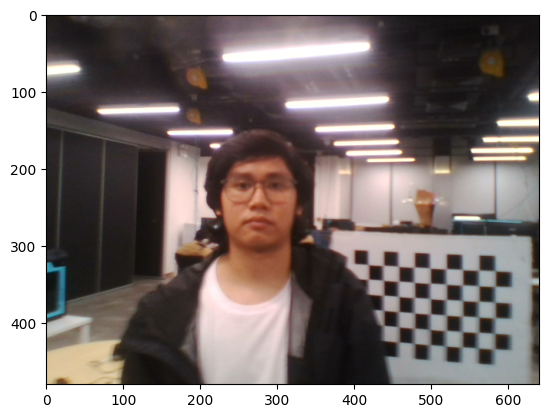

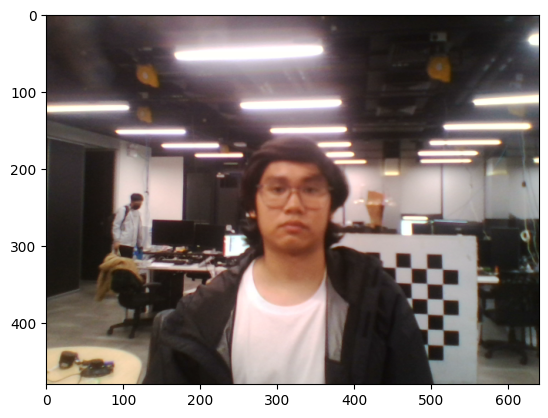

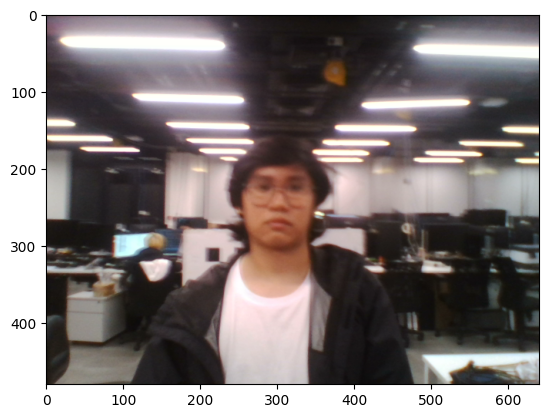

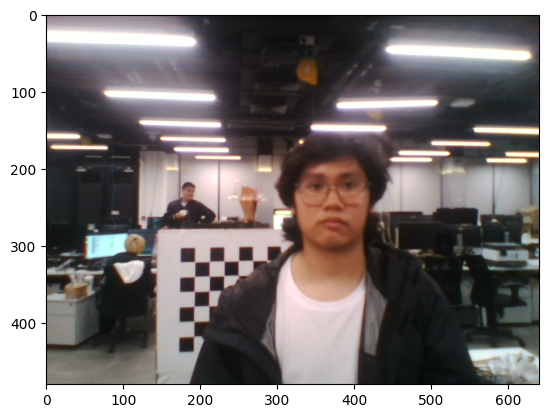

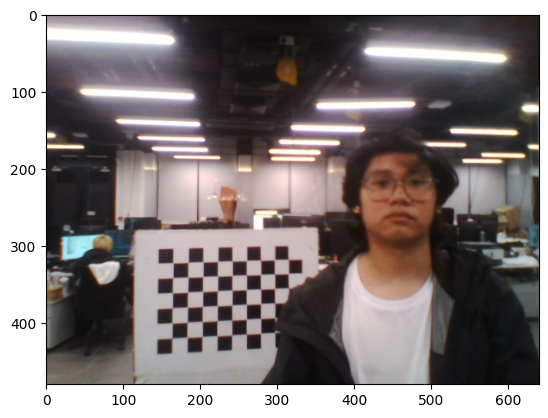

In [6]:
# Check LeftImages
for i in range(len(df)):
    img = df.iloc[i,5]
    plt.imshow(img)
    plt.show()

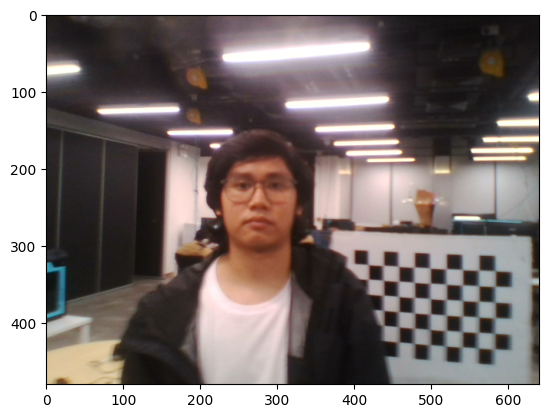

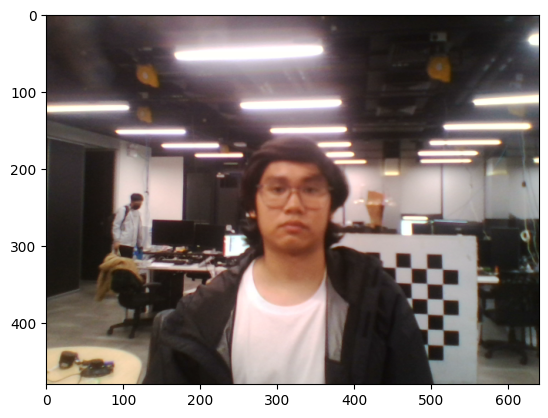

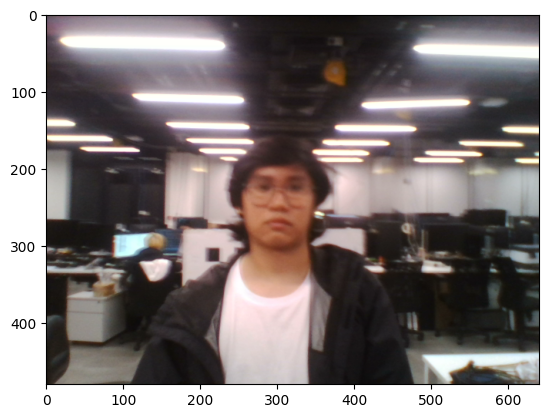

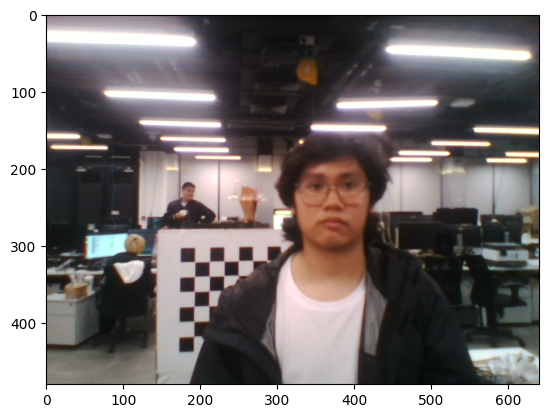

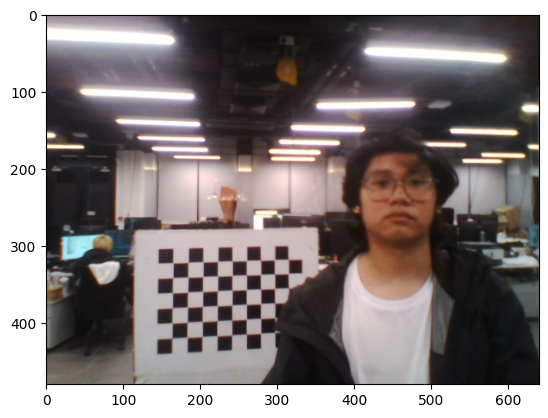

In [7]:
# Check Right Images
for i in range(len(df)):
    img = df.iloc[i,5]
    plt.imshow(img)
    plt.show()

# Face Detection

In [8]:
# Face Detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(os.path.join(os.getcwd(),'pretrained','shape_predictor_68_face_landmarks.dat'))
dlib.cuda.set_device(0)

In [9]:
# Getting Left Target Pixels
pixel_list = []
disp_img_list = []
for i in range(len(df)):
    img = df.iloc[i,5]
    l_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(l_gray, 0)
    if len(detections)>0:
        detection = detections[0]
        landmarks = predictor(img, detection)
        x_target = round((landmarks.part(40).x + landmarks.part(43).x)/2)
        y_target = round((landmarks.part(40).y + landmarks.part(43).y)/2)
        pixel_list.append((x_target, y_target))
        disp_img = cv2.rectangle(img, (detection.left(), detection.top()), (detection.right(), detection.bottom()), (0, 0, 255), 2)
        disp_img = cv2.drawMarker(disp_img, (x_target,y_target), color=(255, 0, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=13, thickness=2)
        disp_img_list.append(disp_img)
    else:
        pixel_list.append((None, None))
        disp_img_list.append(img)
df['left_target_pixel'] = pixel_list
df['left_disp_img']= disp_img_list

# Getting Right Target Pixels
pixel_list = []
disp_img_list = []
for i in range(len(df)):
    img = df.iloc[i,6]
    l_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detections = detector(l_gray, 0)
    if len(detections)>0:
        detection = detections[0]
        landmarks = predictor(img, detection)
        x_target = round((landmarks.part(40).x + landmarks.part(43).x)/2)
        y_target = round((landmarks.part(40).y + landmarks.part(43).y)/2)
        pixel_list.append((x_target, y_target))
        disp_img = cv2.rectangle(img, (detection.left(), detection.top()), (detection.right(), detection.bottom()), (0, 0, 255), 2)
        disp_img = cv2.drawMarker(disp_img, (x_target,y_target), color=(255, 0, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=13, thickness=2)
        disp_img_list.append(disp_img)
    else:
        pixel_list.append((None, None))
        disp_img_list.append(img)
df['right_target_pixel'] = pixel_list
df['right_disp_img']= disp_img_list

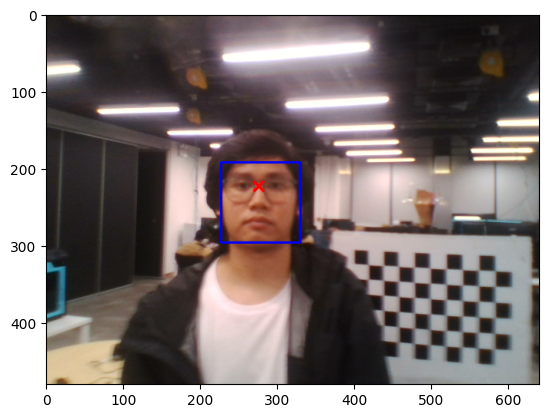

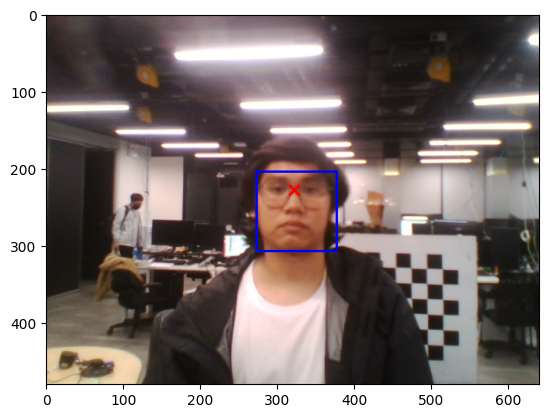

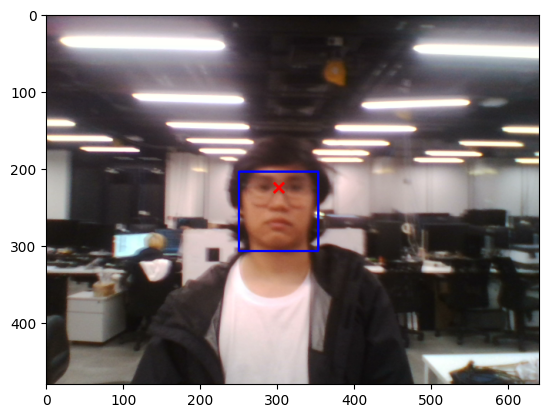

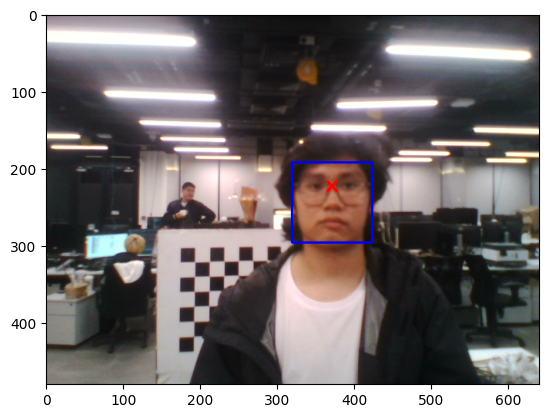

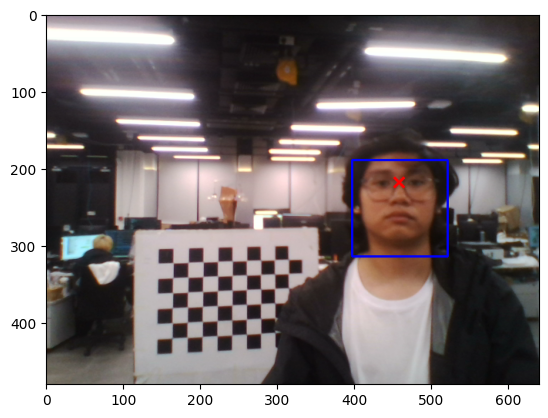

In [10]:
# Check Left Images
for i in range(len(df)):
    img = df.iloc[i,5]
    plt.imshow(img)
    plt.show()

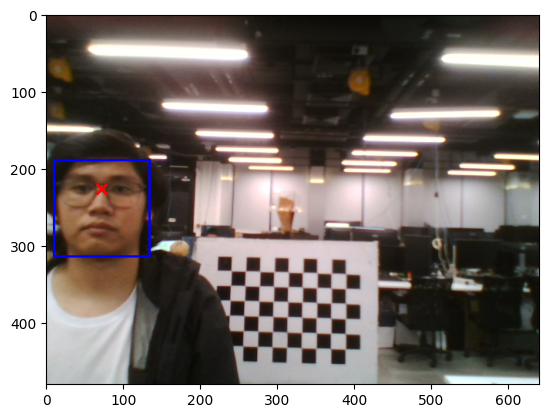

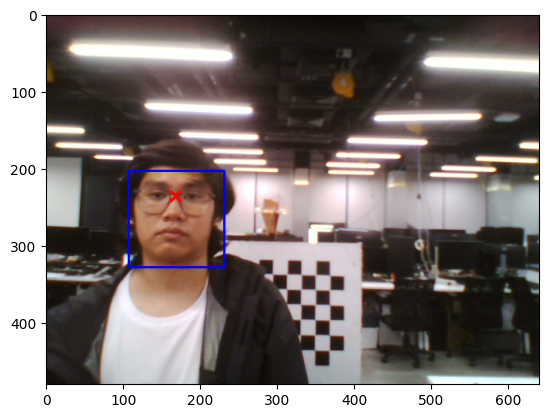

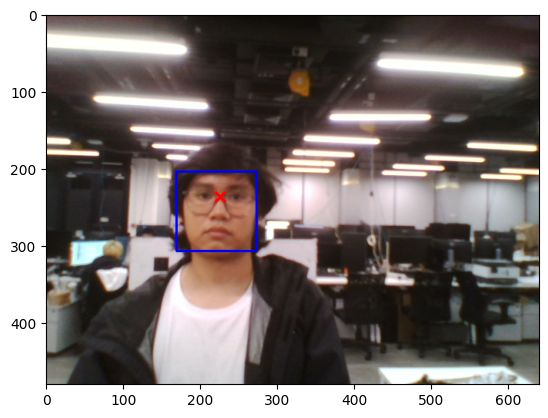

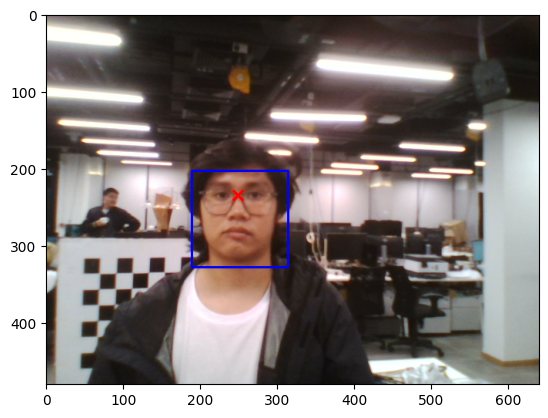

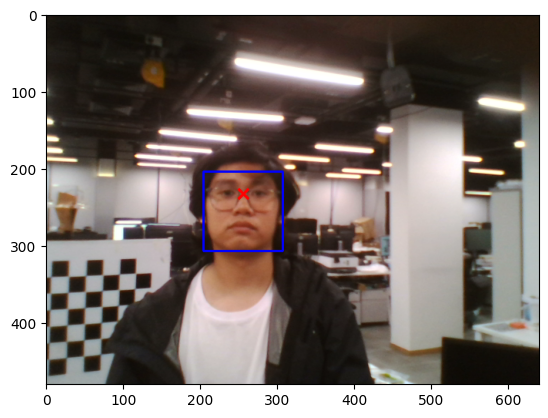

In [11]:
# Check Right Images
for i in range(len(df)):
    img = df.iloc[i,6]
    plt.imshow(img)
    plt.show()

# DataFrame

# Analysis

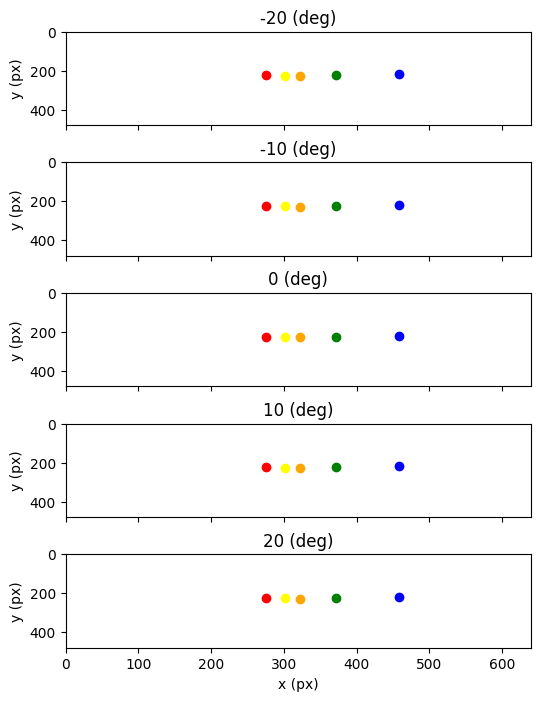

In [12]:
# Left Image

target_list = [-20, -10, 0, 10, 20]
color_list = ['red', 'orange', 'yellow', 'green', 'blue']
marker_list = ['*', 'o']
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(6, 8), sharex='col', sharey='row')

for i in range(len(target_list)):
    left_target_pixel_list = df['left_target_pixel'].tolist()
    for j, (x, y) in enumerate(left_target_pixel_list):
        axs[i].scatter(x,y, color=color_list[j])
        axs[i].set_xlim([0, 639])
        axs[i].set_ylim([479,0])
        axs[i].set_ylabel('y (px)')
        axs[i].set_title(str(target_list[i]) + " (deg)" )

axs[-1].set_xlabel('x (px)')
fig.subplots_adjust(hspace=0.4, wspace=1)
plt.show()

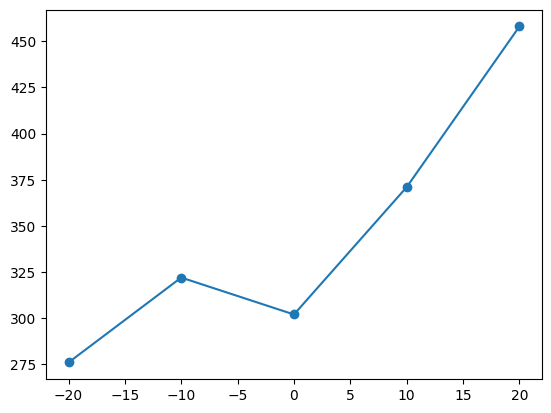

In [13]:
x_left_target_pixel_list = [x[0] for x in left_target_pixel_list]
plt.plot(target_list, x_left_target_pixel_list, marker='o')

In [25]:
x_left_target_pixel_list

[276, 322, 302, 371, 458]

Text(0, 0.5, 'Left Eye Position (deg)')

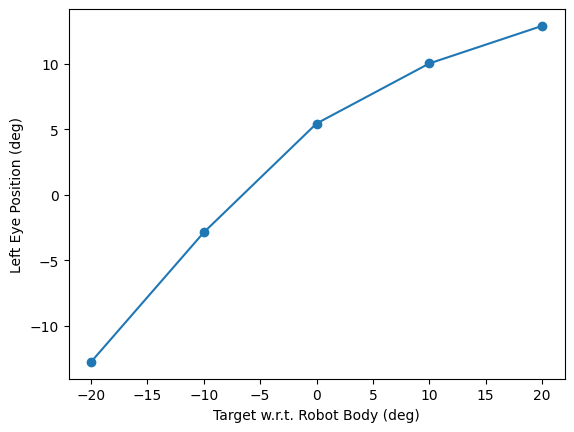

In [22]:
left_eye_position_list = []
for i in range(len(df)):
    left_eye_position_list.append(df.iloc[i,2][0])

plt.plot(target_list, left_eye_position_list, marker='o')
plt.xlabel('Target w.r.t. Robot Body (deg)')
plt.ylabel('Left Eye Position (deg)')

In [26]:
left_eye_position_list

[-12.733083984375,
 -2.8613671875,
 5.43659765625,
 10.01478515625,
 12.876152343749999]

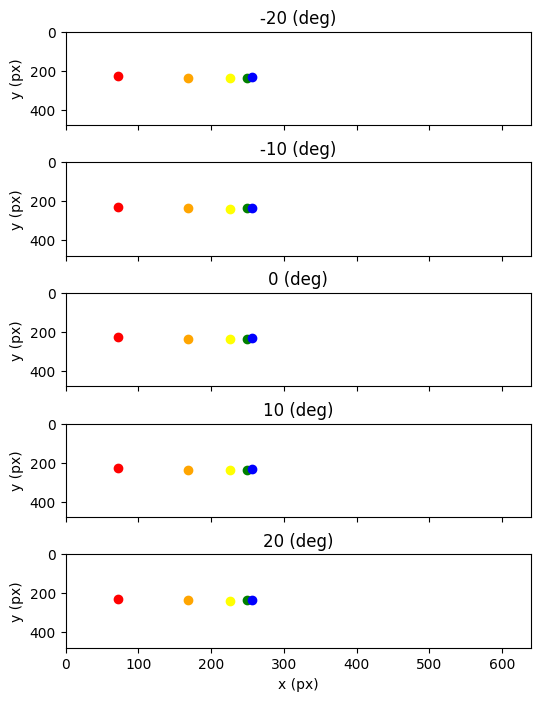

In [15]:
# Right Image

target_list = [-20, -10, 0, 10, 20]
color_list = ['red', 'orange', 'yellow', 'green', 'blue']
marker_list = ['*', 'o']
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(6, 8), sharex='col', sharey='row')

for i in range(len(target_list)):
    right_target_pixel_list = df['right_target_pixel'].tolist()
    for j, (x, y) in enumerate(right_target_pixel_list):
        axs[i].scatter(x,y, color=color_list[j])
        axs[i].set_xlim([0, 639])
        axs[i].set_ylim([479,0])
        axs[i].set_ylabel('y (px)')
        axs[i].set_title(str(target_list[i]) + " (deg)" )

axs[-1].set_xlabel('x (px)')
fig.subplots_adjust(hspace=0.4, wspace=1)
plt.show()

Text(0.5, 0, 'Target w.r.t. Robot Body (deg)')

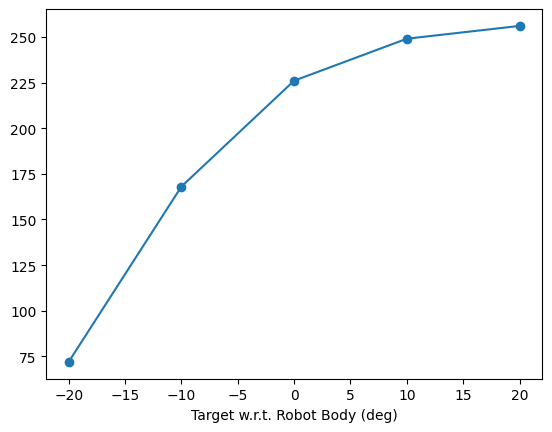

In [16]:
x_right_target_pixel_list = [x[0] for x in right_target_pixel_list]
plt.plot(target_list, x_right_target_pixel_list, marker='o')
plt.xlabel('Target w.r.t. Robot Body (deg)')

In [17]:
x_right_target_pixel_list

[72, 168, 226, 249, 256]

Text(0, 0.5, 'Right Eye Position (deg)')

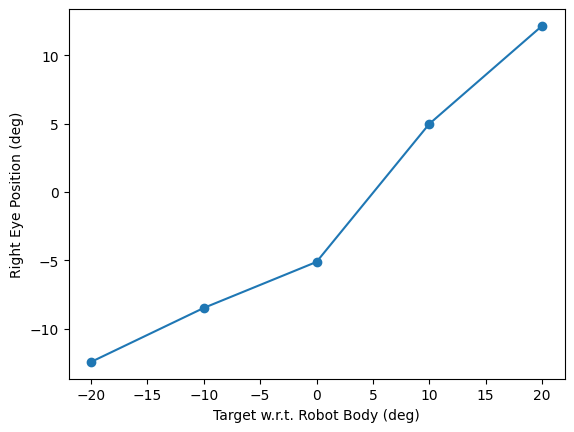

In [23]:
right_eye_position_list = []
for i in range(len(df)):
    right_eye_position_list.append(df.iloc[i,2][1])

plt.plot(target_list, right_eye_position_list, marker='o')
plt.xlabel('Target w.r.t. Robot Body (deg)')
plt.ylabel('Right Eye Position (deg)')

In [24]:
right_eye_position_list

[-12.4439501953125,
 -8.491166015625,
 -5.1239794921875,
 4.9775800781249995,
 12.1511513671875]